In [1]:
import requests
from bs4 import BeautifulSoup
from newspaper import Article
import csv

In [2]:
###########################################################
# CODE FOR LAUDATO SI 
###########################################################
laudato_si = "https://www.vatican.va/content/francesco/en/encyclicals/documents/papa-francesco_20150524_enciclica-laudato-si.html"

In [6]:
ls_response = requests.get(laudato_si)
#print(ls_response.status_code)

info = Article(laudato_si)
info.download()
info.parse()
info.nlp()

keywords = info.keywords
text = info.text

save = [info, keywords, text]
#data.append(save)
#print(info.keywords)

In [7]:
with open('LaudatoSi.csv', 'w') as csv_file:
    header = ['URL', 'Keywords', 'Text']
    writer = csv.writer(csv_file)
    writer.writerow(header)
    writer.writerow(save)
    csv_file.close()

In [8]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
#% matplotlib inline

In [9]:
# Load in the dataframe
# note, the index_col=0 is so that the first row does not get read
ls = pd.read_csv('LaudatoSi.csv', converters={'Keywords': eval}, index_col=0)

In [10]:
ls.head()

,Keywords,Text
URL,,
<newspaper.article.Article object at 0x7f81b81953a0>,"[life, si, way, world, laudato, beings, nature...",ENCYCLICAL LETTER\n\nLAUDATO SI’\n\nOF THE HOL...


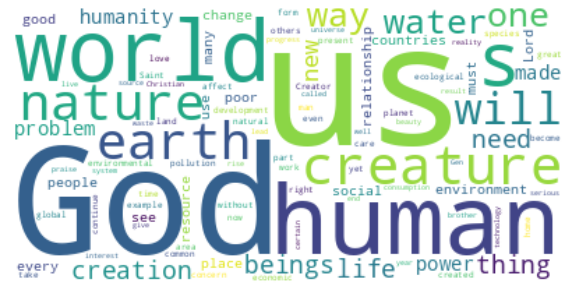

In [22]:
# stopwords is simply a set of words to be eliminated
# if STOPWORDS not manually set, then this default list will be used
stopwords = set(STOPWORDS)

text = ls.Text[0]

# Create and generate a basic word cloud image:
wordcloud = WordCloud(stopwords=stopwords,max_words=100,background_color="white",collocations=False).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
###########################################################
# END CODE
###########################################################

In [2]:
feeds = [
         'https://www.nbcnews.com/rss', 
         'https://www.theguardian.com/us/rss', 
         'https://www.rt.com/rss/usa/', 
         'https://abcnews.go.com/abcnews/usheadlines', 
         'https://www.cbsnews.com/latest/rss/us', 
         'https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml'
]

In [4]:
articles = []

for feed in feeds:
    response = requests.get(feed)
    webpage = response.content
    soup = BeautifulSoup(webpage, features='xml')

    items = soup.find_all('item')

    for item in items:
        link = item.find('link').text
        articles.append(link)

In [5]:
print(len(articles))

340


In [8]:
data = []
for url in articles:
    info = Article(url)
    info.download()
    info.parse()
    info.nlp()

    keywords = info.keywords
    text = info.text

    save = [url, keywords, text]
    data.append(save)

In [9]:
with open('MyCSV3.csv', 'w') as csv_file:
    # set the column labels for the CSV file
    label = ['URL', 'Keywords', 'Text']

    # write the data into the CSV file
    writer = csv.writer(csv_file)
    writer.writerow(label)
    writer.writerows(data)
    csv_file.close()

In [10]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

In [67]:
# Load in the dataframe
# note, the index_col=0 is so that the first row does not get read
df = pd.read_csv('MyCSV3.csv', converters={'Keywords': eval})
#print(df.Keywords[0])
#print(type(df.Keywords[0]))

In [68]:
print(df.shape[0])

340


In [69]:
df.head()

,URL,Keywords,Text
0,https://www.nbcnews.com/politics/politics-news...,"[americans, troops, deadline, american, state,...","Around 1,500 American citizens remain in Afgha..."
1,https://www.nbcnews.com/health/health-news/cov...,"[pregnant, ill, covid19, critically, hospitali...",As the delta variant drives a surge in hospita...
2,https://www.nbcnews.com/news/us-news/western-l...,"[california, drought, western, letter, disaste...",Congressional leaders are calling on President...
3,https://www.nbcnews.com/news/us-news/death-sen...,"[federal, dylann, rev, killed, church, court, ...",A federal appeals court Wednesday upheld a dea...
4,https://www.nbcnews.com/politics/politics-news...,"[attorneys, parker, statements, election, spre...",WASHINGTON — A federal judge Wednesday sanctio...


In [93]:
# Start with one article:
text = df.Text[177]
# text = " ".join(i for i in keywords)
print(df.URL[177])

https://www.rt.com/usa/532671-covid19-vaccine-mandates-poll/?utm_source=rss&utm_medium=rss&utm_campaign=RSS


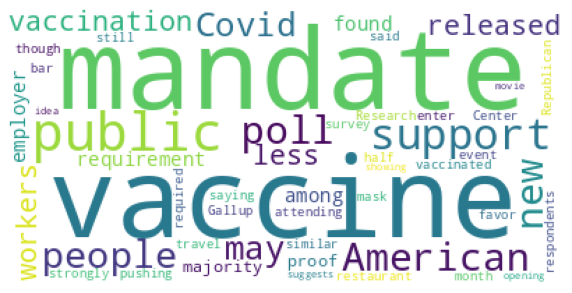

In [94]:
# stopwords is simply a set of words to be eliminated
# if STOPWORDS not manually set, then this default list will be used
stopwords = set(STOPWORDS)

#if you want to add to the stopwords list
stopwords.update(['s','t','rt','co','abc','nbc','cbs','nytimes'])
#print(stopwords)

# Create and generate a basic word cloud image:
wordcloud = WordCloud(stopwords=stopwords,max_words=50,background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [73]:
keywords = [j for i in df.Keywords for j in i]

# join all of the keywords into a single string text
text = " ".join(i for i in keywords)
# print(text)

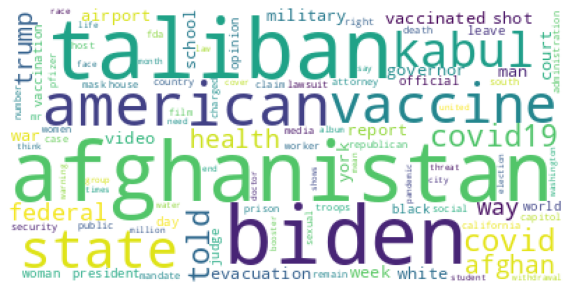

In [90]:
# collocations=False so that duplicate words do not appear as part of a larger phrase (like 'president Biden')
wordcloud = WordCloud(stopwords=stopwords,max_words=100,background_color="white",collocations=False).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [91]:
import numpy as np
from wordcloud import ImageColorGenerator

# Generate a word cloud image
frame = np.array(Image.open("usa.png"))

#print(frame)

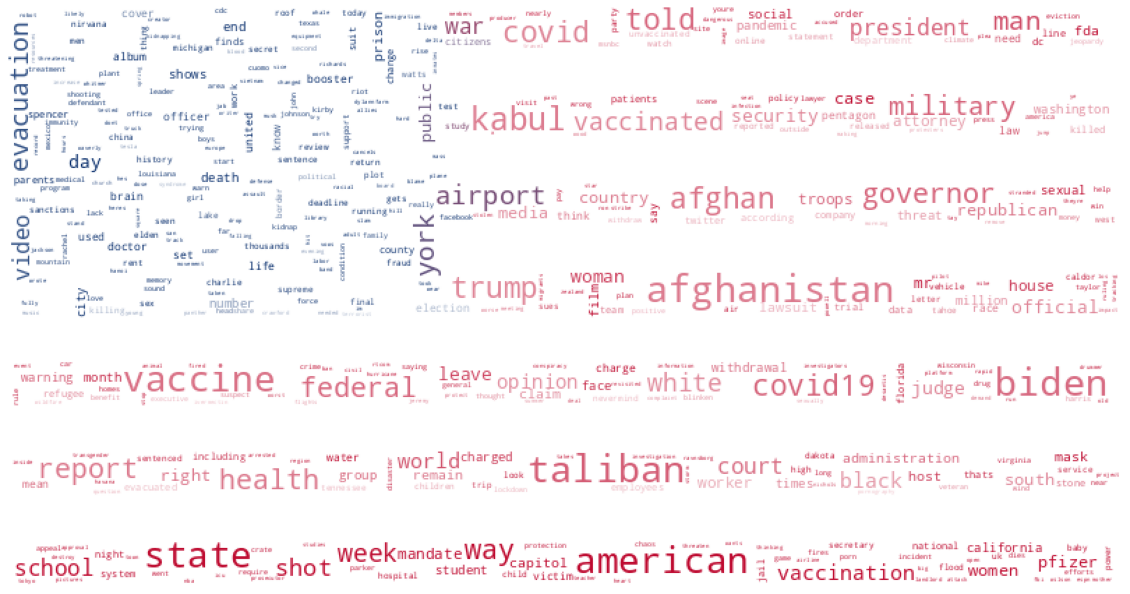

In [92]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, collocations=False, mask=frame).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(frame)

plt.figure(figsize=[20,20])
#add the color scheme to the word cloud
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis("off")
plt.show()